#libraries

In [ ]:
import scipy.stats
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from scipy import signal
from google.colab import files

# Q1

For the *Moby Dick** data calculate the PDF and estimate the power-law
exponent.
The frequency of occurrence of unique words in the novel Moby Dick by Herman Melville.
<a href="https://aaronclauset.github.io/powerlaws/data/words.txt">Download the data</a>

M. E. J. Newman, "Power laws, Pareto distributions and Zipf's law." Contemporary Physics 46, 323 (2005).

In [ ]:
uploaded = files.upload()

Saving Moby Dick.txt to Moby Dick (1).txt


In [ ]:
data = pd.read_csv('Moby Dick.txt', header = None)
data

,0
0,14086
1,6414
2,6260
3,4573
4,4484
...,...
18850,1
18851,1
18852,1
18853,1


## using scipy.stats

In [ ]:
# finding the parameters
[a_fit, loc_fit, scale_fit] = scipy.stats.powerlaw.fit(data)
print(a_fit, loc_fit, scale_fit)

0.1810403866781568 0.9999999999999998 25861.81942609112


In [ ]:
exponent = a_fit - 1
print(" the power-law exponent is {:.4f} ".format(exponent),"using the powerlaw package of scipy.")

 the power-law exponent is -0.8190  using the powerlaw package of scipy.


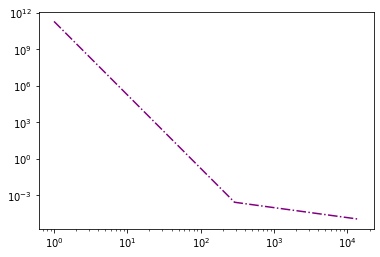

In [ ]:
# logarithmic plot with parameters
x = np.linspace(np.min(data), np.max(data))
plt.loglog(x,scipy.stats.powerlaw.pdf(x, a_fit, loc_fit, scale_fit),'-.',color = 'purple',label = 'data points')
plt.show()

## using np.polyfit

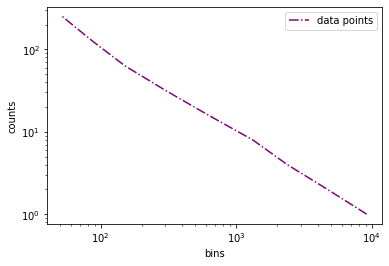

In [ ]:
ar = np.arange(0,3,0.3)
bins = 10 ** ar
x = np.histogram(data, bins = bins)[0]
y = np.histogram(data, bins = bins)[1]
plt.loglog(x,y[:-1],"-.", label = 'data points',color = 'purple')
plt.legend()
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()

In [ ]:
exp = np.polyfit(np.log(x), np.log(y[:-1]), 1)[0]
print(" the power-law exponent is {:.4f} ".format(exp),"using plyfit package of numpy")

 the power-law exponent is -1.0432  using plyfit package of numpy


# Q2

For the beautiful and eye catching *Hooman.jpg* picture that we have uploaded for you, by using the *Mexiacn hat* wavelet and *Morlet* wavelet, determine the boundaries and plot the output.
You can use convolution in order to apply discrete wavelet transform.

In [ ]:
uploadim = files.upload()

Saving Hooman.jpg to Hooman.jpg


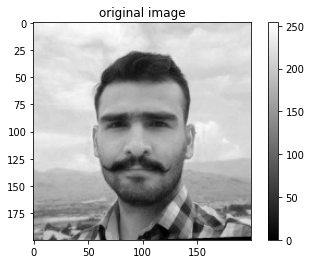

In [ ]:
image = Image.open("Hooman.jpg")
imdata = np.array(image)
plt.imshow(imdata[:,:,0], cmap='gray')
plt.colorbar()
plt.title('original image')
plt.show()

## mexican hat wavelet

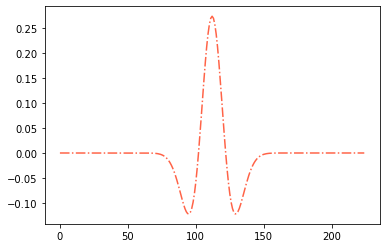

In [ ]:
# the wavelet we wanna use
mex_w = signal.ricker(225,10)
plt.plot(mex_w,'-.',color='tomato')
plt.show()

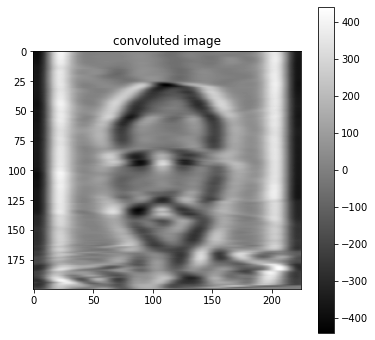

In [ ]:
# implement convolution
len = imdata[:,:,0].shape[0]
conv_im = []
for i in range(len):
  conv_im.append(np.convolve(mex_w,imdata[i,:,0],mode='same'))

conv_im = np.array(conv_im)
plt.figure(figsize=(6,6))
plt.imshow(conv_im, cmap='gray')
plt.title('convoluted image')
plt.colorbar()
plt.show()

In [ ]:
print( 'tresh param' ,conv_im.mean())
print( 'maxval param' ,conv_im.max())

tresh param 21.785043774108036
maxval param 440.88938500140716


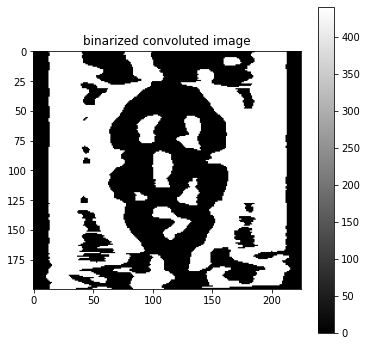

In [ ]:
# binzrization of image
th, binaryim = cv2.threshold(src=conv_im, thresh=21.785043774108036, maxval=440.88938500140716, type=cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(binaryim, cmap = 'gray')
plt.title('binarized convoluted image')
plt.colorbar()
plt.show()

## morlet wavelet

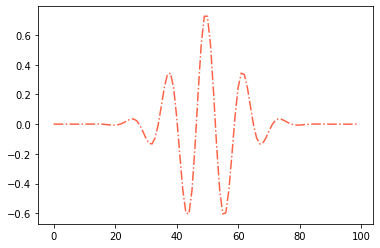

In [ ]:
# the wavelet we wanna use
mor_w = signal.morlet(100,5,0.8)
plt.plot(mor_w,'-.',color='tomato')
plt.show()

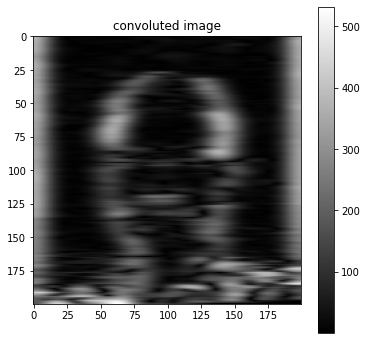

In [ ]:
# implement convolution
len = imdata[:,:,0].shape[0]
conv_im2 = []
for i in range(len):
  conv_im2.append(np.convolve(mor_w,imdata[i,:,0],mode='same'))

conv_im2 = np.array(np.abs(conv_im2))
plt.figure(figsize=(6,6))
plt.imshow((conv_im2), cmap='gray')
plt.title('convoluted image')
plt.colorbar()
plt.show()

In [ ]:
print( 'tresh param' ,conv_im2.mean())
print( 'maxval param' ,conv_im2.max())

tresh param 97.10151580835176
maxval param 532.4086895748826


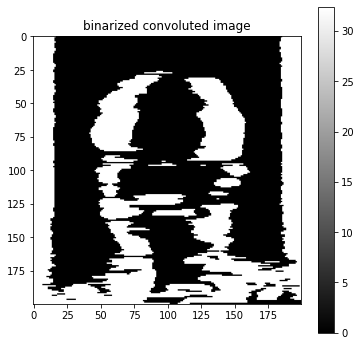

In [ ]:
# binzrization of image
th, binaryim2 = cv2.threshold(src=conv_im2, thresh=97.10151580835176, maxval=32.4086895748826, type=cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(binaryim2, cmap = 'gray')
plt.title('binarized convoluted image')
plt.colorbar()
plt.show()

# Q3

For the *$HSB.txt* determine the local minimums and maximums using *mexican hat* discrete wavelet transform.
** You can use convolution in order to apply discrete wavelet transform.

P.S: Easter egg included (Who ever finds it wins a prize).

In [ ]:
upload3 = files.upload()

Saving $HSB.txt to $HSB.txt


In [ ]:
data3 = pd.read_csv('$HSB.txt',header = None)
data3 = np.array(data3)

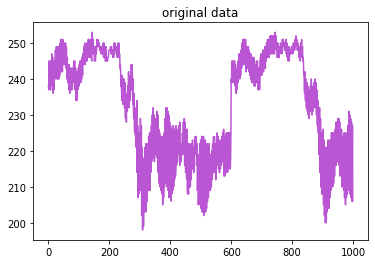

In [ ]:
plt.plot(data3,color='mediumorchid')
plt.title('original data')
plt.show()

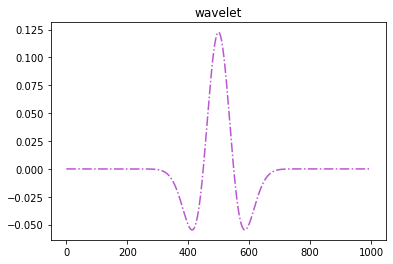

In [ ]:
wavelet = signal.ricker(1000,50)
plt.plot(wavelet,'-.',color='mediumorchid')
plt.title('wavelet')
plt.show()

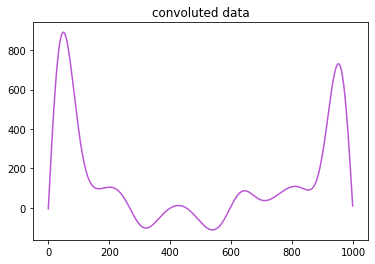

------------------------------------------------------
local maximums are corresponding to x = [ 49 201 428 644 810 952]
local minimums are corresponding to x = [166 321 539 710 853]


In [ ]:
conv_data = np.convolve(wavelet,data3[:,0],mode="same")
peaks, _ = signal.find_peaks(conv_data)
mins, _ = signal.find_peaks(conv_data*-1)
plt.plot(conv_data,color='mediumorchid')
plt.title('convoluted data')
plt.show()
print('------------------------------------------------------')
print("local maximums are corresponding to x =", peaks)
print("local minimums are corresponding to x =", mins)